<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Descriptive Statistics<h1>
  <h4 align="center">Obesity rates dataset</h4>
</p>

---

## Introduction
This notebook is the result of the practice carried out in the course ["Curso de Matemáticas para Data Science: Estadística Descriptiva"](https://platzi.com/cursos/estadistica-descriptiva/), where the Dataset "ObesityDataSet_raw_and_data_synthetic" was used evaluates obesity rates in individuals from Colombia, Peru and Mexico.

The purpose of the project is to put into practice the concepts of descriptive statistics focused on data science, through the following workflow:

- Development
  - Data types and description
  - Null Data Review
- Statistical analysis
  - Measures of central tendency
  - Measures of dispersion
- Measures of dispersion
  - Standard deviation:
  - Range and quartiles
- Outlier detection
- Linear scaling of numerical variables
  - Linear scaling min-max
  - Z-score scaling
- Nonlinear scaling of numerical variables
- Scaling of categorical variables
  - One-hot scaling
  - One-hot with Scikit learn
  - One-hot with pandas "dummies" method

For more information share the notes in Notion of the course with more functions [View site ](https://aluminum-carbon-41d.notion.site/C-Matem-ticas-para-DS-Estad-stica-Descriptiva-174aa85e176e446eb82e00618f5877ff?pvs=4)

## Data
The Data set ["ObesityDataSet_raw_and_data_synthetic"](https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels/code) of kaggel contains indices of obesity based on eating habits & physical cond

**Columns**

*Feeding Habits*

* Frequent consumption of high-calorie foods (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Daily water consumption (CH20)
* Alcohol consumption (CALC).

*Physical condition*
* Monitoring calorie consumption (SCC),
* Frequency of physical activity (FAF),
* Time using technological devices (TUE),
* Transportation used (MTRANS),

___


## Development
### Importing Libraries

In [171]:
! pip install --upgrade pip setuptools==57.5.0
! pip install regressors

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import regressors 
import random
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats

print('Imported libraries')

Imported libraries


### Import the dataset

In [173]:
df = pd.read_csv("../data/life_expectancy.csv")
df.sample(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
1568,Albania,ALB,Europe & Central Asia,Upper middle income,2010,76.562,5.8,4449.999809,4.745796,NaN,14.090,NaN,44.296584,81439.75,68800.04,560636.42
1346,Papua New Guinea,PNG,East Asia & Pacific,Lower middle income,2008,61.442,27.0,4760.000229,2.135261,NaN,2.311,3.0,NaN,322181.52,1805306.12,1440633.54
2710,Marshall Islands,MHL,East Asia & Pacific,Upper middle income,2016,NaN,NaN,180.000007,17.373610,15.28000,NaN,3.5,NaN,2574.76,4186.83,14128.37
1872,Paraguay,PRY,Latin America & Caribbean,Upper middle income,2011,72.860,7.2,5219.999790,5.829289,NaN,4.670,NaN,53.504598,209504.19,305293.33,1007985.99
2865,Kazakhstan,KAZ,Europe & Central Asia,Upper middle income,2017,72.950,2.5,214580.001831,3.052444,2.75082,4.900,NaN,NaN,827947.52,588490.41,4268960.03


### Understanding the data

In [174]:
df.shape

(3306, 16)

Since linear regressions are performed with correlated variables, it is necessary to see the correlations between the variables

Text(0.5, 1.0, 'Correlation matrix of numerical variables')

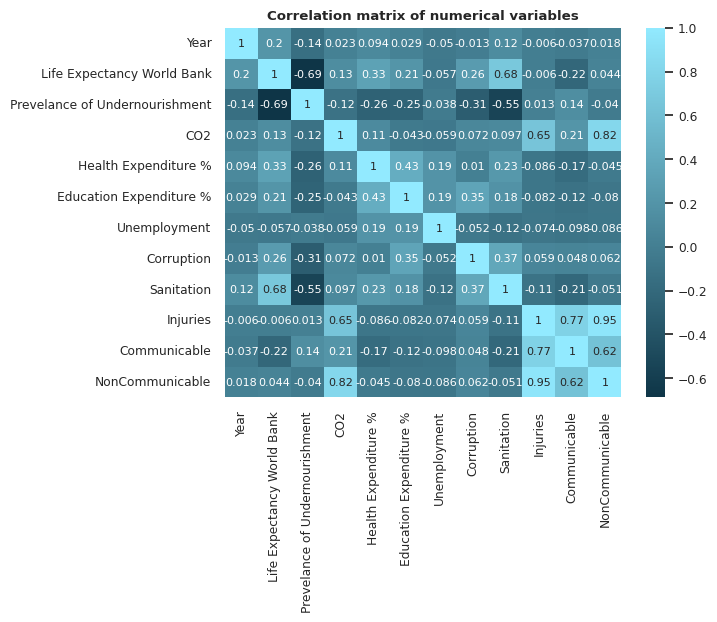

In [175]:
# Numerical variables
colum_num = df.select_dtypes(include=['int64', 'float64']).columns

colors = ["#0E3547", "#92EAFF"]
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=256)

sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df[colum_num].corr(), cbar = True, cmap = cmap, annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix of numerical variables", fontweight='bold')

The variables with the highest correlation:
- Prevalence of Undernourishment
- Life Expectancy World Bank

Text(0.5, 1.0, 'Correlation between Undernourishment and Life expectancy')

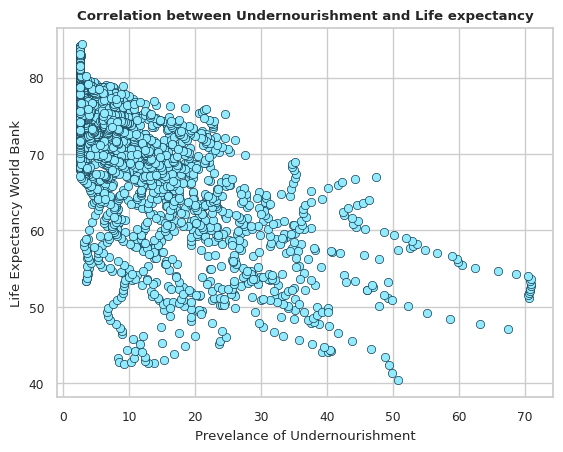

In [176]:
sns.scatterplot(data=df, x=df["Prevelance of Undernourishment"], y=df["Life Expectancy World Bank"], color = colors[1], edgecolor=colors[0])
plt.title("Correlation between Undernourishment and Life expectancy", fontweight='bold')

___
### Simple linear regression

In [177]:
df["Prevelance of Undernourishment"].isnull().sum()

684

In [178]:
df["Life Expectancy World Bank"].isnull().sum()

188

#### Adjust null values
Replacing the null values with the mean of each variable segmented by the "region" variable, avoiding increasing the bias of the variables

In [179]:
df_2 = df.copy()

mean_undernourishment_by_region = df_2.groupby("Region")["Prevelance of Undernourishment"].transform("mean")
df_2["Prevelance of Undernourishment"].fillna(mean_undernourishment_by_region, inplace = True)
df_2["Prevelance of Undernourishment"].isnull().sum()

0

In [180]:
mean_life_expectancy = df_2.groupby("Region")["Life Expectancy World Bank"].transform("mean")
df_2["Life Expectancy World Bank"].fillna(mean_life_expectancy, inplace = True)
df_2["Life Expectancy World Bank"].isnull().sum()

0

In [181]:
X_col = df_2[["Prevelance of Undernourishment"]]
y_col = df_2[["Life Expectancy World Bank"]]
X_col.shape

(3306, 1)


Split training and test data

In [182]:
X_train, X_test, y_train, y_test =  train_test_split(X_col, y_col)

Standardize data

In [183]:
X_col = X_col.values.reshape(-1, 1)  # Convierte a una matriz 2D
y_col = y_col.values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)


In [184]:
print("X_train: {}".format(X_train.shape[0]),
      "X_test: {}".format(X_test.shape[0]), sep = "\n")

X_train: 2479
X_test: 827


### Create the model

In [185]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [186]:
y_pred = model.predict(X_test)
y_pred.shape

(827, 1)

___
## Evaluate the model

**Mean Squared Error**

In [231]:
mse = metrics.mean_squared_error(y_test, y_pred)

**Determination coefficient R**

In [230]:
r2 = metrics.r2_score(y_test, y_pred)

In [189]:
print("mse:", mse.round(4))
print("r2:", r2.round(4))

mse: 0.5121
r2: 0.4879


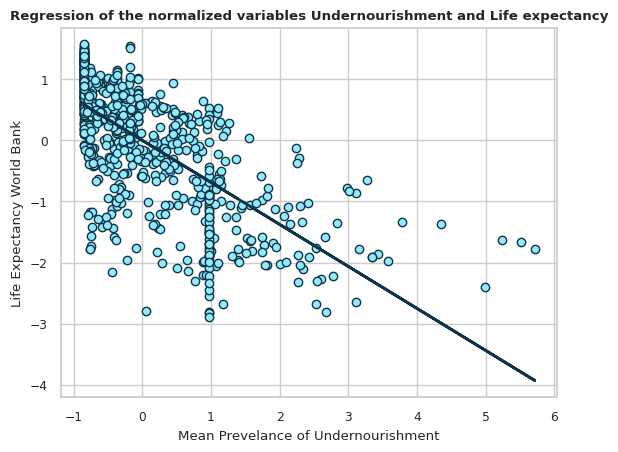

In [190]:
plt.scatter(x=X_test, y=y_test, color = colors[1], edgecolor=colors[0] )
plt.plot(X_test, y_pred, color= colors[0], linewidth=2)
plt.xlabel("Mean Prevelance of Undernourishment")
plt.ylabel("Life Expectancy World Bank")
plt.title("Regression of the normalized variables Undernourishment and Life expectancy", fontweight="bold");

#### Create predictions
Random value to predict within the range of the independent variable

In [191]:
mean = np.mean(df_2["Prevelance of Undernourishment"])
std = np.std(df_2["Prevelance of Undernourishment"])

value_undernourishment = np.random.normal(mean, std)
value_undernourishment

24.347889387784864

In [192]:
value_undernourishment_scl = sc_x.transform(np.array([value_undernourishment]).reshape(-1,1))
value_undernourishment_scl 

/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.24835711]])

Do the inverse transform

In [193]:
pred_life_expectancy = sc_y.inverse_transform(model.predict(value_undernourishment_scl))[0,0]
print("For a country with a prevalence of malnutrition of {}% the life expectancy is {} years".format(np.round(value_undernourishment, 2),
       np.round(pred_life_expectancy, 2)))

For a country with a prevalence of malnutrition of 24.35% the life expectancy is 61.73 years


___
## Multivariable regression

### Data purification and cleaning

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

The variables with the greatest number of Null values in order:
- Corruption
- Sanitation
- Education Expenditure %
- Prevelance of Undernourishment
- Unemployment

#### Adjust null values
##### Variable "Corruption"
Replacing the null values with the mean of each variable segmented by the "region" variable, avoiding increasing the bias of the variables

In [195]:
df_3 = df.copy()

def replace_values_null_by_Region (var, df):
    """
    Function that replaces null values with the mean of the variable segmented by the "region" variable
    
    Arguments:
    var = Variable to replace null values
    df = Data frame
    
    Returns:
    val_null = Check if there are null values in the variables
    """
    mean =  df.groupby("Region")[var].transform("mean")
    df[var].fillna(mean, inplace = True)
    val_null = df[var].isnull().sum()
    print("Null values in the cleaned variable:", val_null) 
    
replace_values_null_by_Region(var = "Corruption", df = df_3)

Null values in the cleaned variable: 57


The records for the "North America" Region do not identify values for the "Corruption" variable. It is decided to replace it with the average value of a Region with similar life expectancy indices.

In [196]:
df_3.groupby("Region")["Life Expectancy World Bank"].mean()

Region
East Asia & Pacific           72.048998
Europe & Central Asia         76.182598
Latin America & Caribbean     73.588976
Middle East & North Africa    74.605994
North America                 79.686498
South Asia                    68.527579
Sub-Saharan Africa            57.542669
Name: Life Expectancy World Bank, dtype: float64

The "Europe & Central Asia" Region has the closest life expectancy rate to the "North America" region. Replace the mean of the "Corruption" variable of the "Europe & Central Asia" Region into the "North America" Region.

In [197]:
corruption_EU =  df_3[df_3["Region"] == "Europe & Central Asia"]["Corruption"].mean()
df_3["Corruption"].fillna(corruption_EU, inplace = True)
df_3["Corruption"].isnull().sum()

0

In [198]:
def validate_deleted_records(df):
    df_c = df.copy()
    df_c = df_c.dropna()
    print("Raw data frame:", df.shape[0])
    print("Clean data:", df_c.shape[0])

validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 1296


Observe if the same qualities have been maintained between the original data and the included records

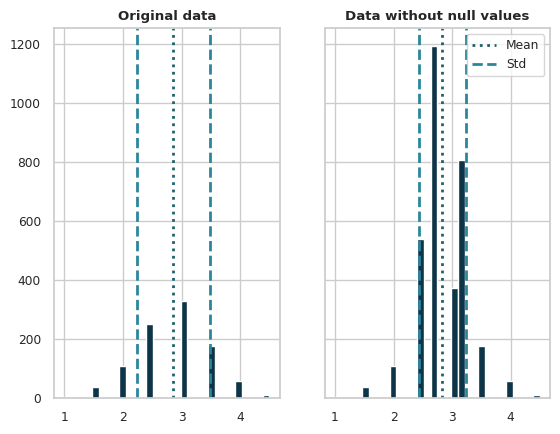

In [199]:
def fig_plot_data_comparison(var, df_i, df_e):
    fig, ax = plt.subplots(1, 2, sharey=True)
    ax[0].hist(df_i[var], bins=30, color = colors[0])
    ax[0].axvline(df_i[var].mean(), color = "#206170", linestyle="dotted", linewidth=2, label="Mean")
    ax[0].axvline(df_i[var].mean() - df_i[var].std(), color="#2A869B", linestyle="dashed", linewidth=2, label="Std")
    ax[0].axvline(df_i[var].mean() + df_i[var].std(), color="#2A869B", linestyle="dashed", linewidth=2)
    ax[0].set_title("Original data", fontweight='bold')

    ax[1].hist(df_e[var], bins=30, color = colors[0])
    ax[1].axvline(df_e[var].mean(), color = "#206170", linestyle="dotted", linewidth=2, label="Mean")
    ax[1].axvline(df_e[var].mean() - df_e[var].std(), color="#2A869B", linestyle="dashed", linewidth=2, label="Std")
    ax[1].axvline(df_e[var].mean() + df_e[var].std(), color="#2A869B", linestyle="dashed", linewidth=2)
    ax[1].set_title("Data without null values", fontweight='bold')
    plt.legend();
    
fig_plot_data_comparison(var = "Corruption", df_i = df, df_e = df_3)

#### Adjust null values
##### Variable "Sanitation"

In [200]:
df["Sanitation"].describe()

count    2059.000000
mean       52.738785
std        30.126762
min         2.377647
25%        24.746007
50%        49.317481
75%        80.278847
max       100.000004
Name: Sanitation, dtype: float64

In [201]:
df_3["Sanitation"].isna().sum()

1247

In [202]:
replace_values_null_by_Region(var = "Sanitation", df = df_3)

Null values in the cleaned variable: 0


In [203]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 1860


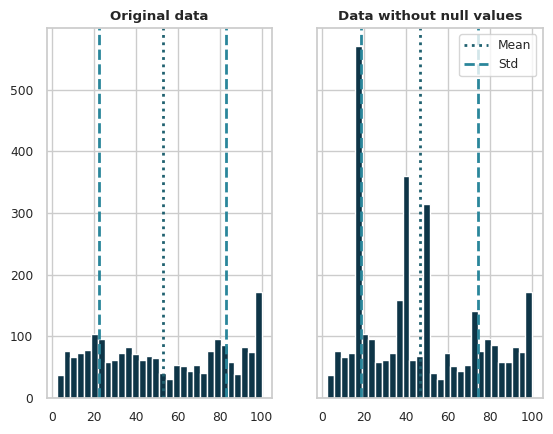

In [204]:
fig_plot_data_comparison(var = "Sanitation", df_i = df, df_e = df_3)

#### Adjust null values
##### Variable "Education Expenditure %"


In [205]:
df["Education Expenditure %"].describe()

count    2216.000000
mean        4.589014
std         2.119165
min         0.850320
25%         3.136118
50%         4.371465
75%         5.519825
max        23.270000
Name: Education Expenditure %, dtype: float64

In [206]:
df_3["Education Expenditure %"].isna().sum()

1090

In [207]:
replace_values_null_by_Region(var = "Education Expenditure %", df = df_3)

Null values in the cleaned variable: 0


In [208]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 2551


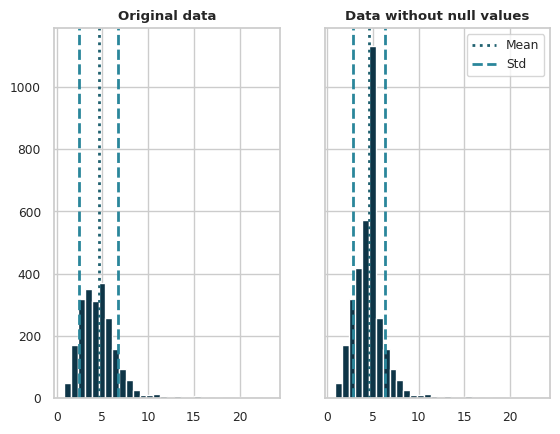

In [209]:
fig_plot_data_comparison(var = "Education Expenditure %", df_i = df, df_e = df_3)

#### Adjust null values
##### Variable "Prevelance of Undernourishment"

In [210]:
df["Prevelance of Undernourishment"].describe()

count    2622.000000
mean       10.663654
std        11.285897
min         2.500000
25%         2.500000
50%         6.200000
75%        14.775000
max        70.900000
Name: Prevelance of Undernourishment, dtype: float64

In [211]:
df_3["Prevelance of Undernourishment"].isna().sum()

684

In [212]:
replace_values_null_by_Region(var = "Prevelance of Undernourishment", df = df_3)

Null values in the cleaned variable: 0


In [213]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 2898


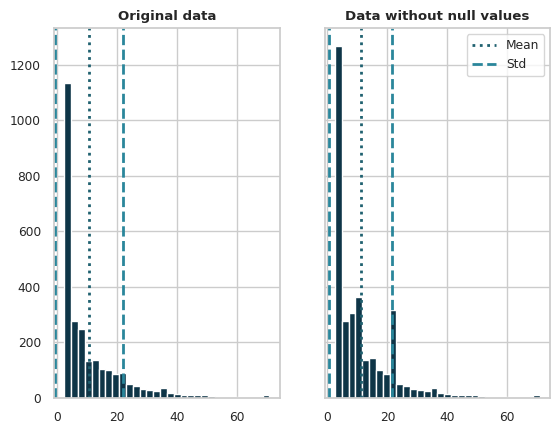

In [214]:
fig_plot_data_comparison(var = "Prevelance of Undernourishment", df_i = df, df_e = df_3)

2898 records of the 3306 have been adjusted, a discrimination is made with respect to the rest of the records with null values that are equivalent to 12.34% of the data set


In [215]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 2898


In [216]:
df_clean = df_3.dropna()
deleted_records = df_3.shape[0] - df_clean.shape[0]
percentage_records = round((deleted_records * 100 / df_3.shape[0]), 2)

print("Total records deleted: {}".format(df_3.shape[0] - df_clean.shape[0]),
      "Percentage of records deleted: {}%".format(percentage_records), sep="\n")

Total records deleted: 408
Percentage of records deleted: 12.34%


___
### Analyze the data
It begins by recognizing how the data of the predictor variable is distributed.

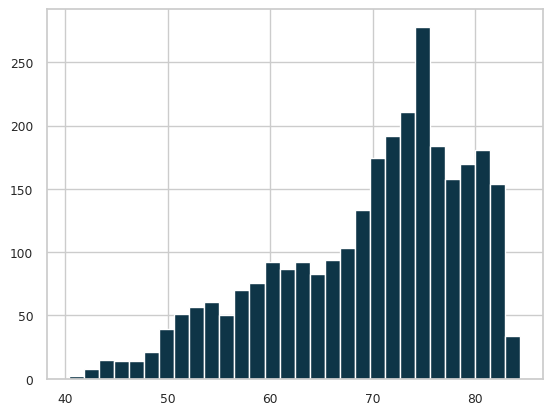

In [217]:
plt.hist(df_clean["Life Expectancy World Bank"], bins=30, color=colors[0]);


Understand correlations between numerical variables to select additional variables

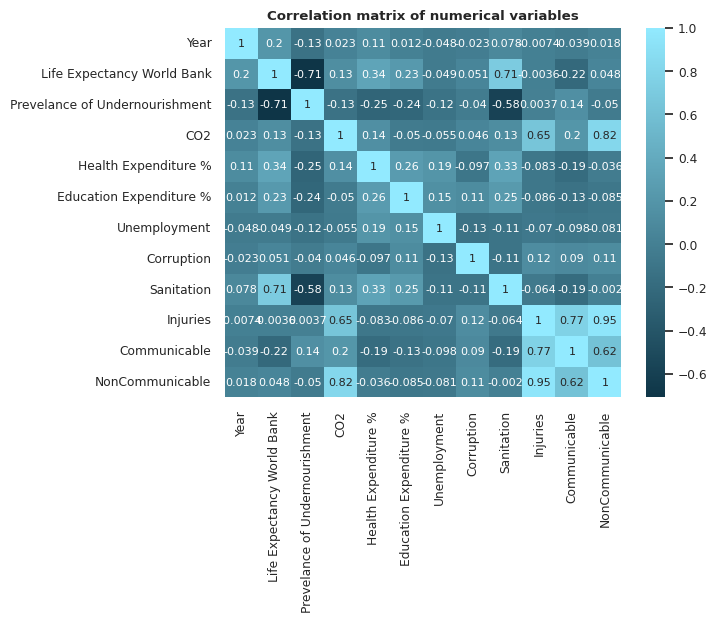

In [218]:
sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df_clean[colum_num].corr(), cbar = True, cmap = cmap, annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix of numerical variables", fontweight='bold');

___
### Convert categorical variables to numeric, with **One-hot encoding**

In [219]:
colum_cat = df_clean.select_dtypes(include=['object']).columns
colum_cat

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup'], dtype='object')

The variables "Region" and "IncomeGroup" are normalized as they have few categories and the categories "Country Name" and "Country Code" are isolated.

In [220]:
df_clean = df_clean.drop(["Country Name", "Country Code"], axis=1)
df_clean = pd.get_dummies(df_clean, columns=["Region", "IncomeGroup"], drop_first = True ) *1
df_clean.sample(5)

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,...,NonCommunicable,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
2307,2014,75.878,2.9,147740.005493,6.547214,4.786771,10.210,2.500000,18.983353,1220395.16,...,6752637.69,0,0,1,0,0,0,0,1,0
2907,2017,66.947,12.1,198830.001831,2.902294,2.899520,3.916,3.000000,36.286540,5945204.74,...,39693840.20,0,0,0,0,1,0,0,1,0
1130,2007,77.609,9.9,15039.999962,8.559788,2.583570,8.980,2.500000,11.535229,94995.25,...,869211.06,0,0,1,0,0,0,0,1,0
1425,2009,52.313,16.3,6030.000210,4.469702,3.173940,6.593,2.500000,15.668302,709348.47,...,3152349.08,0,0,0,0,0,1,0,1,0
2795,2017,72.693,2.5,31959.999084,3.736515,2.473820,5.000,2.646341,22.787964,243624.94,...,2374777.30,1,0,0,0,0,0,0,0,1


___
## Model training
Separate the predictive feature from the other columns

In [236]:
X_cols = list(set(df_clean.columns)- set(["Life Expectancy World Bank"]))
y_col = ["Life Expectancy World Bank"]
X_cols[:2]

['Year', 'NonCommunicable']

Define the X and Y variables:

In [237]:
X = df_clean[X_cols].values
y = df_clean[y_col].values
X

array([[2.00100000e+03, 2.66351634e+06, 0.00000000e+00, ...,
        6.75000000e+01, 1.59600000e+04, 0.00000000e+00],
       [2.00100000e+03, 5.32324750e+05, 0.00000000e+00, ...,
        4.90000000e+00, 3.23000000e+03, 1.00000000e+00],
       [2.00100000e+03, 4.81740700e+05, 0.00000000e+00, ...,
        2.80000000e+00, 9.72000000e+04, 0.00000000e+00],
       ...,
       [2.01900000e+03, 1.02142619e+07, 0.00000000e+00, ...,
        6.30000000e+00, 4.39640015e+05, 1.00000000e+00],
       [2.01900000e+03, 2.64968782e+06, 1.00000000e+00, ...,
        2.14565789e+01, 6.80000019e+03, 0.00000000e+00],
       [2.01900000e+03, 2.36403148e+06, 0.00000000e+00, ...,
        2.14565789e+01, 1.17600002e+04, 0.00000000e+00]])

Split training and test data

In [225]:
X_train, X_test, y_train, y_test =  train_test_split(X, y)

Standardize data

In [226]:
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(X)
sc_y.fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

Create the model

In [227]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Data prediction

In [228]:
y_pred = model.predict(X_test)
y_pred.shape

(725, 1)

___
## Evaluating the model

**Mean Squared Error**

In [232]:
mse = metrics.mean_squared_error(y_test, y_pred)

**Determination coefficient R**

In [233]:
r2 = metrics.r2_score(y_test, y_pred)

In [234]:
print("mse:", mse.round(4))
print("r2:", r2.round(4))

mse: 0.151
r2: 0.8501


#### General summary of results with "stats"
Clean up the intercept and slope data based on how stats receives it:

In [235]:
model.intercept_ = model.intercept_[0] # W0
model.coef_ = model.coef_.reshape(-1) # W1, W2 ..
model.coef_.shape

(20,)

In [240]:
y_test = y_test.reshape(-1)

print("============= Summary===============")
stats.summary(model, X_test, y_test, X_cols)

============= Summary===============


Residuals:
    Min     1Q  Median     3Q    Max
-1.2301 -0.218  0.0084 0.3003 1.4436


Coefficients:
                                   Estimate  Std. Error  t value   p value
_intercept                         0.006412    0.014512   0.4418  0.658743
Year                               0.166860    0.014773  11.2946  0.000000
NonCommunicable                    0.230073    0.082668   2.7831  0.005524
IncomeGroup_Low income            -0.317666    0.026080 -12.1803  0.000000
Communicable                      -0.162378    0.022637  -7.1732  0.000000
Region_Europe & Central Asia       0.018889    0.025623   0.7372  0.461252
Health Expenditure %               0.115036    0.018158   6.3353  0.000000
Region_North America               0.028295    0.014799   1.9120  0.056276
Education Expenditure %           -0.016414    0.015373  -1.0677  0.286001
Region_Sub-Saharan Africa         -0.484226    0.027904 -17.3530  0.000000
Corruption                         0.025297    0.018274   1.3843  0.166698

**Check residuals**
* See the relationship between predictions and actual labels
* X axis: predictions

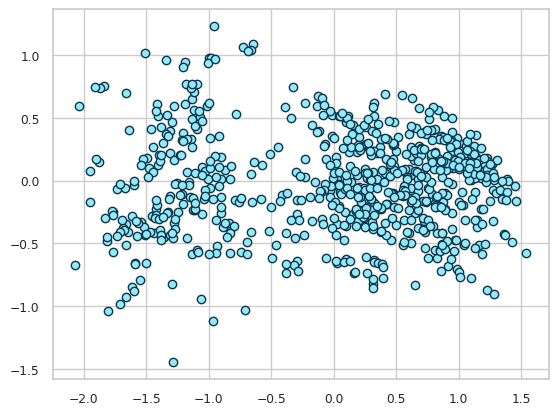

In [241]:
def check_residuals (y_test, y_pred):
    residuals = np.subtract(y_test, y_pred.reshape(-1))
    plt.scatter(y_pred, residuals, color = colors[1], edgecolor=colors[0]);

check_residuals (y_test, y_pred)